# p25: Stability regions for ODE formulas

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
from numpy import pi,real,imag,zeros,exp,arange
from matplotlib.pyplot import figure,subplot,plot,axis,grid,title

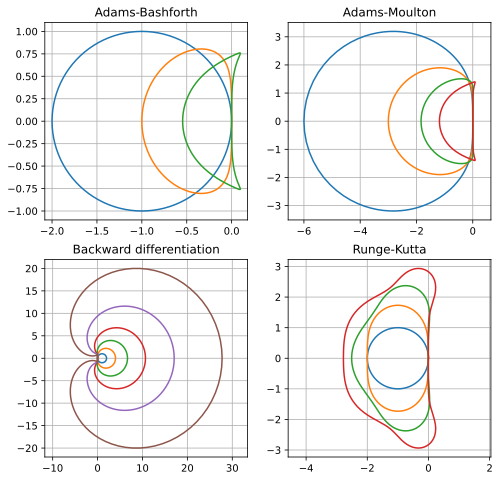

In [2]:
figure(figsize=(8,8))

# Adams-Bashforth
subplot(2,2,1)
z = exp(1j*pi*arange(0,201)/100); r = z - 1
s = 1; rr = r/s; plot(real(rr),imag(rr))
s = (3 - 1/z)/2; rr = r/s; plot(real(rr),imag(rr))
s = (23 - 16/z + 5/z**2)/12; rr = r/s; plot(real(rr),imag(rr))
axis('equal'); grid('on')
title('Adams-Bashforth')

# Adams-Moulton
subplot(2,2,2)
s = (5*z + 8 - 1/z)/12; rr = r/s; plot(real(rr),imag(rr))
s = (9*z + 19 - 5/z + 1/z**2)/24; rr = r/s; plot(real(rr),imag(rr))
s = (251*z + 646 - 264/z + 106/z**2 - 19/z**3)/720; rr = r/s; plot(real(rr),imag(rr))
d = 1 - 1/z
s = 1 - d/2 - d**2/12 - d**3/24 - 19*d**4/720 - 3*d**5/160; dd = d/s; plot(real(dd),imag(dd))
axis('equal'); grid('on')
title('Adams-Moulton')

# Backward differentiation
subplot(2,2,3)
r = 0
for i in range(1,7):
    r = r + d**i/i; plot(real(r),imag(r))
axis('equal'); grid('on')
title('Backward differentiation')

# Runge-kutta
subplot(2,2,4)
w = 0; W = 1j*zeros(len(z)); W[0] = w;
for i in range(1,len(z)):
    w = w - (1+w-z[i]); W[i] = w
plot(real(W),imag(W))
w = 0; W = 1j*zeros(len(z)); W[0] = w;
for i in range(1,len(z)):
    w = w - (1+w+0.5*w**2-z[i]**2)/(1+w); W[i] = w
plot(real(W),imag(W))
w = 0; W = 1j*zeros(len(z)); W[0] = w;
for i in range(1,len(z)):
    w = w - (1+w+0.5*w**2+w**3/6-z[i]**3)/(1+w+0.5*w**2); W[i] = w
plot(real(W),imag(W))
w = 0; W = 1j*zeros(len(z)); W[0] = w;
for i in range(1,len(z)):
    w = w - (1+w+0.5*w**2+w**3/6+w**4/24-z[i]**4)/(1+w+w**2/2+w**3/6); W[i] = w
plot(real(W),imag(W))
axis('equal'); grid('on')
title('Runge-Kutta');